In [1]:
from pyspark.sql import SparkSession
import pymongo
from bson import json_util

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["NYPD"]
collection = db["NYPD_Cleaned"]

In [21]:
count = collection.count_documents({})
print("Total count of documents in the collection:", count)

Total count of documents in the collection: 1945750


In [8]:
first_doc = collection.find_one()
print(first_doc)

{'_id': ObjectId('6459872efa42a60e401075f4'), 'CMPLNT_NUM': 100208792, 'CMPLNT_FR_DT': '2014-01-14', 'CMPLNT_FR_TM': '2023-05-08 00:25:00', 'ADDR_PCT_CD': 108, 'RPT_DT': '2014-01-14', 'KY_CD': 351, 'OFNS_DESC': 'CRIMINAL MISCHIEF & RELATED OF', 'PD_CD': 259, 'PD_DESC': 'CRIMINAL MISCHIEF,UNCLASSIFIED 4', 'CRM_ATPT_CPTD_CD': 'COMPLETED', 'LAW_CAT_CD': 'MISDEMEANOR', 'BORO_NM': 'QUEENS', 'LOC_OF_OCCUR_DESC': 'INSIDE', 'PREM_TYP_DESC': 'RESIDENCE - APT. HOUSE', 'X_COORD_CD': 1011387, 'Y_COORD_CD': 212017, 'SUSP_AGE_GROUP': 'UNKNOWN', 'SUSP_RACE': 'WHITE HISPANIC', 'SUSP_SEX': 'MALE', 'Latitude': 40.748580841, 'Longitude': -73.902061752, 'Lat_Lon': '(40.748580841, -73.902061752)', 'PATROL_BORO': 'PATROL BORO QUEENS NORTH', 'VIC_AGE_GROUP': '25-44', 'VIC_RACE': 'WHITE HISPANIC', 'VIC_SEX': 'MALE', 'OFNS_CATS': 'PROPERTY', 'Borough': 'Queens', 'Neighborhood': 'Woodside', 'NLatitude': 40.74634908860222, 'NLongitude': -73.90184166838284, 'LatLong': [40.748580841, -73.902061752], 'NLatLong': [4

### How many crimes were reported in each borough?

In [6]:
# result = collection.aggregate([
#     {"$group": {"_id": "$BORO_NM", "count": {"$sum": 1}}}
# ])

# for document in result:
#     print(document)

{'_id': 'BRONX', 'count': 421331}
{'_id': 'QUEENS', 'count': 389085}
{'_id': 'BROOKLYN', 'count': 576764}
{'_id': 'MANHATTAN', 'count': 468537}
{'_id': 'STATEN ISLAND', 'count': 90033}


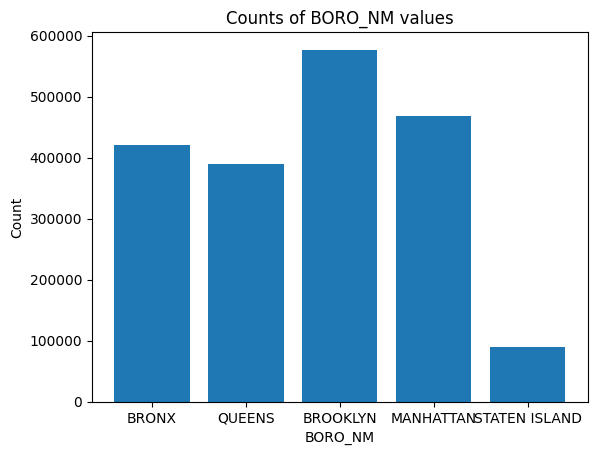

In [4]:
import matplotlib.pyplot as plt

result = collection.aggregate([
    {"$group": {"_id": "$BORO_NM", "count": {"$sum": 1}}}
])

boro_names = []
counts = []

for document in result:
    print(document)
    boro_names.append(document["_id"])
    counts.append(document["count"])

plt.bar(boro_names, counts)
plt.title("Counts of BORO_NM values")
plt.xlabel("BORO_NM")
plt.ylabel("Count")
plt.show()


### To analyze the number of crimes reported in different boroughs over time

In [8]:
# result = collection.aggregate([
#     {"$group": {"_id": {"borough": "$BORO_NM", "year": {"$year": {"$dateFromString": {"dateString": "$CMPLNT_FR_DT"}}}}, "count": {"$sum": 1}}}
# ])

# for document in result:
#     print(document)

In [6]:
#What are the most common days of the week for complaints to occur?

In [7]:
# Importing required libraries
from datetime import datetime
import pandas as pd

# Query to get the number of complaints per day of the week
day_of_week_counts = collection.aggregate([
    {
        '$group': {
            '_id': {
                '$dayOfWeek': {'$dateFromString': {'dateString': '$CMPLNT_FR_DT'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
])

# Convert the results into a dataframe
day_of_week_df = pd.DataFrame(day_of_week_counts)

# Map the numeric day of week to actual day names
day_of_week_df['_id'] = day_of_week_df['_id'].map({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})

# Print the resulting dataframe
print(day_of_week_df)


         _id   count
0     Monday  252879
1    Tuesday  265264
2  Wednesday  279039
3   Thursday  286275
4     Friday  282789
5   Saturday  299347
6     Sunday  280157


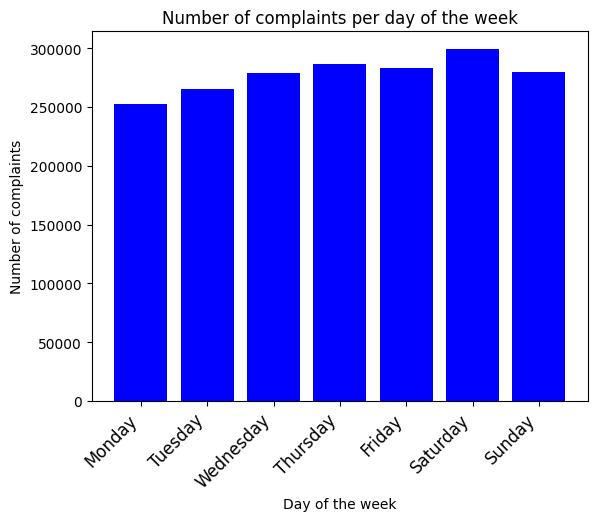

In [38]:
# Importing required libraries
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Query to get the number of complaints per day of the week
day_of_week_counts = collection.aggregate([
    {
        '$group': {
            '_id': {
                '$dayOfWeek': {'$dateFromString': {'dateString': '$CMPLNT_FR_DT'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
])

# Convert the results into a dataframe
day_of_week_df = pd.DataFrame(day_of_week_counts)

# Map the numeric day of week to actual day names
day_of_week_df['_id'] = day_of_week_df['_id'].map({
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
})

# Create a bar chart using matplotlib
plt.bar(day_of_week_df['_id'], day_of_week_df['count'], color='b')
plt.title('Number of complaints per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of complaints')
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotates x-axis labels for better readability
plt.show()


In [8]:
#Are there certain months or seasons where certain types of crimes occur more frequently?

In [9]:
# Query to get the number of complaints per month
month_counts = collection.aggregate([
    {
        '$group': {
            '_id': {
                '$month': {'$dateFromString': {'dateString': '$CMPLNT_FR_DT'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
])

# Convert the results into a dataframe
month_df = pd.DataFrame(month_counts)

# Map the numeric month to actual month names
month_df['_id'] = month_df['_id'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

# Print the resulting dataframe
print(month_df)


          _id   count
0     January  159135
1    February  139616
2       March  159205
3       April  151800
4         May  169173
5        June  167734
6        July  174235
7      August  174404
8   September  168707
9     October  171302
10   November  156564
11   December  153875


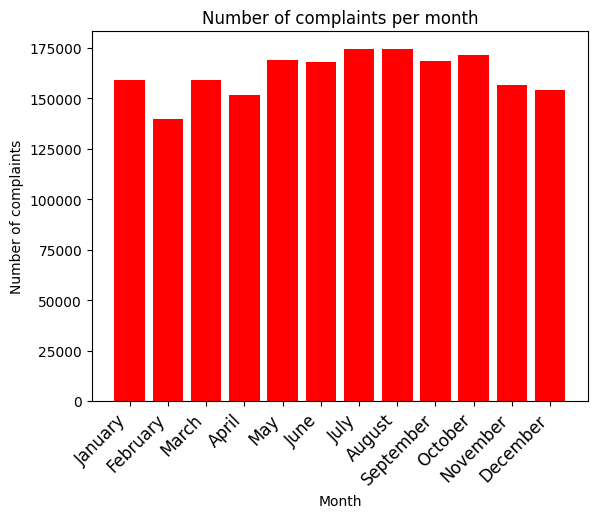

In [37]:
# Importing required libraries
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Query to get the number of complaints per month
month_counts = collection.aggregate([
    {
        '$group': {
            '_id': {
                '$month': {'$dateFromString': {'dateString': '$CMPLNT_FR_DT'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
])

# Convert the results into a dataframe
month_df = pd.DataFrame(month_counts)

# Map the numeric month to actual month names
month_df['_id'] = month_df['_id'].map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

# Create a bar chart using matplotlib
plt.bar(month_df['_id'], month_df['count'], color='r')
plt.title('Number of complaints per month')
plt.xlabel('Month')
plt.ylabel('Number of complaints')
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotates x-axis labels for better readability
plt.show()


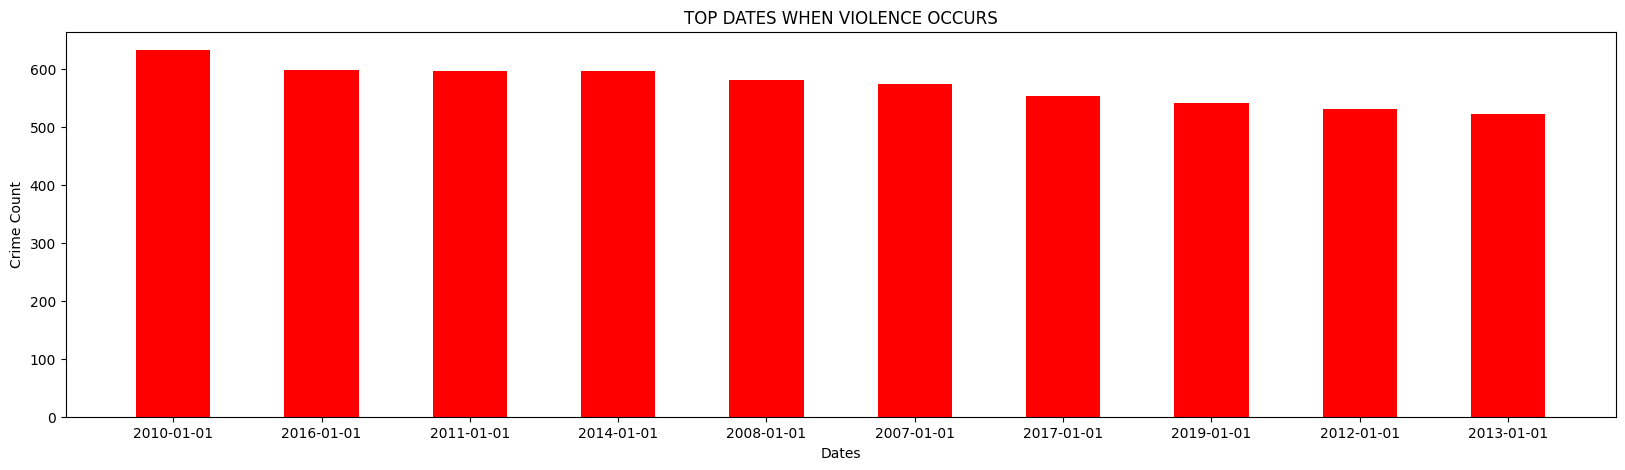

In [40]:
pipeline = [    {        '$group': {            '_id': {                '$dateToString': {                    'format': '%Y-%m-%d',                    'date': {'$toDate': '$CMPLNT_FR_DT'}                }            },            'count': {'$sum': 1}        }    },    {        '$sort': {'count': -1}    },    {        '$limit': 10    }]

Freq_dates = collection.aggregate(pipeline)

x = []
y = []

for doc in Freq_dates:
    x.append(doc['_id'])
    y.append(doc['count'])

plt.figure(figsize=(20, 5))
plt.xlabel("Dates")
plt.ylabel("Crime Count")
plt.title('TOP DATES WHEN VIOLENCE OCCURS')
plt.bar(x, y, width=0.5,color=['r'])
plt.show()


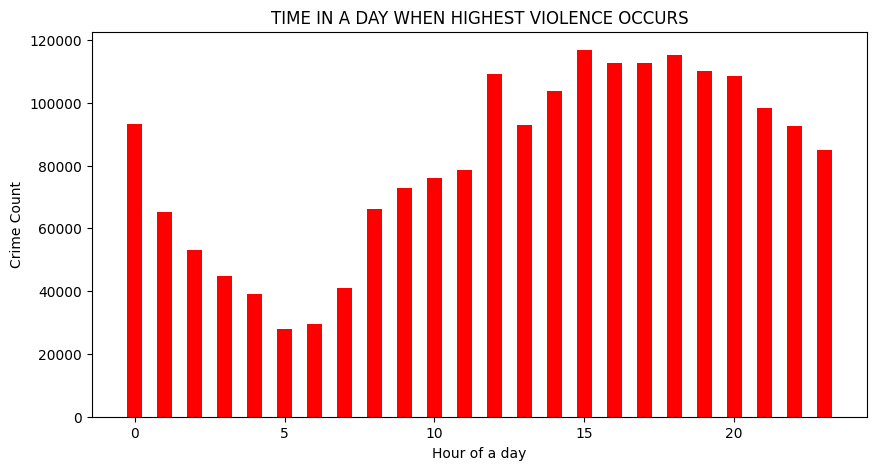

In [41]:
# Importing required libraries
from datetime import datetime
import matplotlib.pyplot as plt

# Query to get the number of complaints per hour of the day
hour_counts = collection.aggregate([
    {
        '$group': {
            '_id': {
                '$hour': {'$dateFromString': {'dateString': '$CMPLNT_FR_TM'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
])

# Convert the results into a list of tuples
hour_tuples = [(doc['_id'], doc['count']) for doc in hour_counts]

# Sort the list by hour
hour_tuples.sort(key=lambda x: x[0])

# Extract the x and y values from the tuples
x = [t[0] for t in hour_tuples]
y = [t[1] for t in hour_tuples]

# Create a bar plot using matplotlib
plt.figure(figsize=(10, 5))
plt.xlabel("Hour of a day")
plt.ylabel("Crime Count")
plt.title('TIME IN A DAY WHEN HIGHEST VIOLENCE OCCURS')
plt.bar(x, y, width=0.5, color=['r'])
plt.show()


## There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

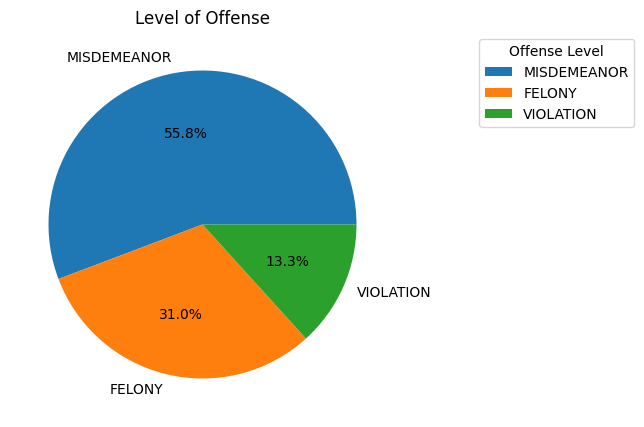

In [45]:
pipeline = [    {        '$group': {            '_id': '$LAW_CAT_CD',            'count': {'$sum': 1}        }    }]

offense_counts = collection.aggregate(pipeline)

offense_df = pd.DataFrame(offense_counts)

fig, ax = plt.subplots(figsize=(10, 5))

offense_df.plot(kind='pie', y='count', labels=offense_df['_id'], ax=ax, autopct='%1.1f%%')
ax.set_title('Level of Offense')
ax.set_ylabel('')
ax.legend(title='Offense Level', bbox_to_anchor=(1.2, 1))

plt.show()


## Distribution of crimes over the years, months and days¶


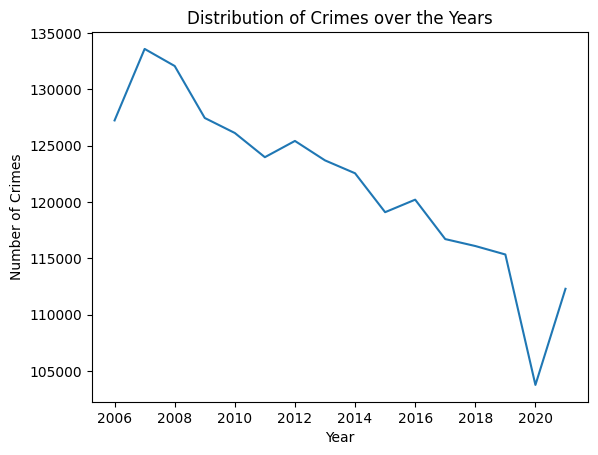

In [47]:
# Import necessary libraries
import pandas as pd
import pymongo
import matplotlib.pyplot as plt

# Query to get the year-wise count of crimes
pipeline = [
    {
        '$group': {
            '_id': {
                '$year': {'$dateFromString': {'dateString': '$RPT_DT'}}
            },
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'_id': 1}
    }
]

# Execute the query and convert the results into a pandas dataframe
year_counts = collection.aggregate(pipeline)
year_df = pd.DataFrame(year_counts)

# Plot the year-wise count of crimes using matplotlib
plt.plot(year_df['_id'], year_df['count'])
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crimes over the Years')
plt.show()


## Sex Victim by Age


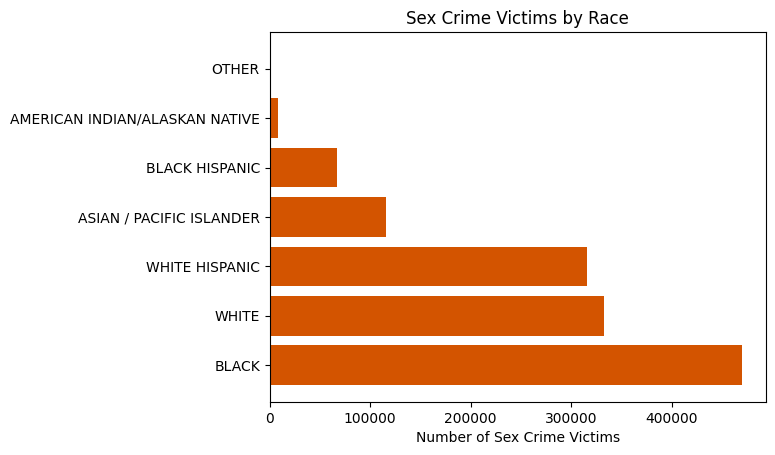

In [51]:
import matplotlib.pyplot as plt

pipeline = [    {"$match": {"VIC_RACE": {"$ne": "UNKNOWN"}}},    {"$group": {"_id": "$VIC_RACE", "count": {"$sum": 1}}},    {"$sort": {"count": -1}},    {"$limit": 7}]

result = collection.aggregate(pipeline)

# Extract the race labels and counts from the pipeline results
race_labels = []
race_counts = []
for record in result:
    race_labels.append(record['_id'])
    race_counts.append(record['count'])

# Plot the bar chart
plt.barh(range(len(race_counts)), race_counts, align='center', color='#D35400')
plt.yticks(range(len(race_counts)), race_labels)
plt.xlabel('Number of Sex Crime Victims')
plt.title('Sex Crime Victims by Race')
plt.show()


## Crimes according to age of suspect & victim

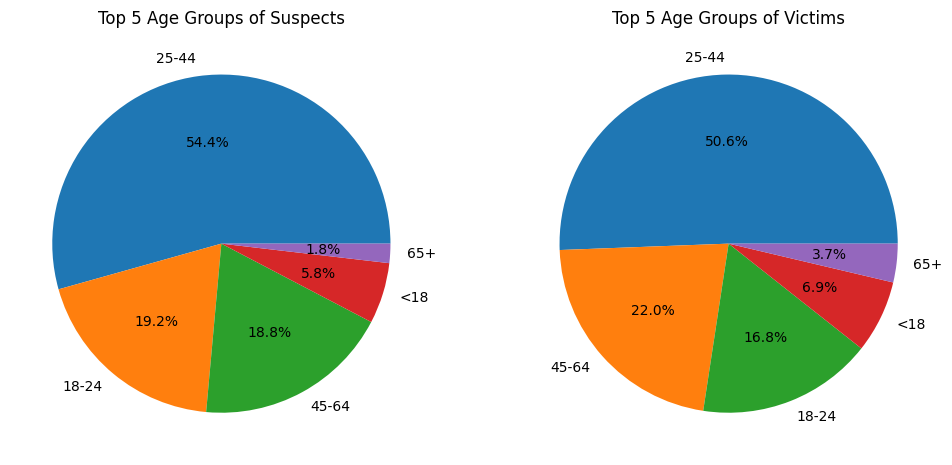

In [12]:
import matplotlib.pyplot as plt

# define the pipeline to group the data by age group and count the occurrences
pipeline = [
    {"$match": {"$and": [{"SUSP_AGE_GROUP": {"$ne": "UNKNOWN"}}, {"VIC_AGE_GROUP": {"$ne": "UNKNOWN"}}]}},
    {"$group": {"_id": {"suspect_age": "$SUSP_AGE_GROUP", "victim_age": "$VIC_AGE_GROUP"}, "count": {"$sum": 1}}},
    {"$sort": {"count": -1}}
]

# execute the pipeline and store the results in a list
result = list(collection.aggregate(pipeline))

# create a dictionary of age groups and their counts for suspects and victims
suspect_age_groups = {}
victim_age_groups = {}
for doc in result:
    suspect_age = doc['_id']['suspect_age']
    victim_age = doc['_id']['victim_age']
    suspect_age_group = f"{suspect_age}"
    victim_age_group = f"{victim_age}"
    count = doc['count']
    if suspect_age_group in suspect_age_groups:
        suspect_age_groups[suspect_age_group] += count
    else:
        suspect_age_groups[suspect_age_group] = count
    if victim_age_group in victim_age_groups:
        victim_age_groups[victim_age_group] += count
    else:
        victim_age_groups[victim_age_group] = count

# get the top 5 age groups by count for suspects and victims
top_5_suspect_age_groups = sorted(suspect_age_groups.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_victim_age_groups = sorted(victim_age_groups.items(), key=lambda x: x[1], reverse=True)[:5]

# create a list of age group labels and counts for suspects and victims
suspect_labels = [age_group[0] for age_group in top_5_suspect_age_groups]
suspect_counts = [age_group[1] for age_group in top_5_suspect_age_groups]

victim_labels = [age_group[0] for age_group in top_5_victim_age_groups]
victim_counts = [age_group[1] for age_group in top_5_victim_age_groups]

# create subplots for the two pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# plot the pie chart for suspects
axs[0].pie(suspect_counts, labels=suspect_labels, autopct='%1.1f%%')
axs[0].set_title("Top 5 Age Groups of Suspects")

# plot the pie chart for victims
axs[1].pie(victim_counts, labels=victim_labels, autopct='%1.1f%%')
axs[1].set_title("Top 5 Age Groups of Victims")

plt.show()


### There seems to be a slight imbalance in age of suspects vs. victims, where suspects are younger than victims on average.



In [3]:
import folium
import pymongo

# Retrieve the data from the MongoDB collection
data = []
for row in collection.find().limit(100):
    data.append(row)

# Create a map centered on the first location in the dataset
map_center = [data[0]['Latitude'], data[0]['Longitude']]
zoom_level = 10
m = folium.Map(location=map_center, zoom_start=zoom_level)

# Add a marker for each location in the dataset
for row in data:
    lat = row['Latitude']
    lon = row['Longitude']  # Corrected typo in accessing longitude
    tooltip = row.get('tooltip', '')  # Use get() to handle missing keys
    popup_text = row.get('popup_text', '')  # Use get() to handle missing keys
    popup = folium.Popup(popup_text)
    folium.Marker([lat, lon], tooltip=tooltip, popup=popup).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m


In [2]:
# Count the number of complaints for each neighborhood
pipeline = [
    {'$group': {'_id': '$Neighborhood', 'num_complaints': {'$sum': 1}}},
    {'$sort': {'num_complaints': -1}}
]
results = collection.aggregate(pipeline)

# Display the results
for result in results:
    print(result['_id'], result['num_complaints'])


East Harlem 44925
Central Harlem 35088
Hamilton Heights 29505
Bedford Stuyvesant 29026
Bushwick 26579
Midtown South 26410
Brownsville 25227
Fordham 23369
Washington Heights 22852
Mott Haven 22846
Midtown 22627
Weeksville 21622
Sunset Park 20932
Concourse 19957
Soundview 19558
Concourse Village 19169
Lincoln Square 17601
Flatiron 17249
Ridgewood 17234
East Williamsburg 17100
Ocean Hill 17073
Mount Hope 17041
New Lots 16518
Melrose 16376
Clinton 16358
East Tremont 16130
Rochdale 15928
Claremont Village 15817
Manhattan Valley 15570
Prospect Lefferts Gardens 15203
Jackson Heights 14170
East New York 14136
Morrisania 14133
South Jamaica 14061
Chelsea 14018
West Farms 13931
Crown Heights 13674
Prospect Heights 12919
Flushing 12749
Lower East Side 12509
Richmond Hill 12471
Manhattanville 12466
Elmhurst 12419
Longwood 12325
Downtown 12247
Jamaica Center 12236
Sutton Place 12174
Upper West Side 12161
University Heights 12106
Belmont 11697
Astoria 11617
Far Rockaway 11532
Ozone Park 11491
Murray

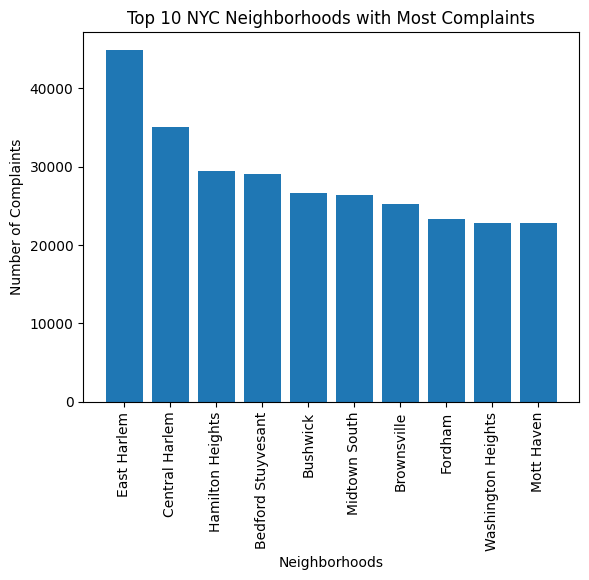

In [7]:
import matplotlib.pyplot as plt

# Create lists for the neighborhoods and the number of complaints
neighborhoods = []
num_complaints = []

# Get the top 10 neighborhoods with the highest number of complaints
results = list(collection.aggregate(pipeline))[:10]
for result in results:
    neighborhoods.append(result['_id'])
    num_complaints.append(result['num_complaints'])

# Create a bar chart of the top 10 neighborhoods
plt.bar(neighborhoods, num_complaints)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Complaints')
plt.title('Top 10 NYC Neighborhoods with Most Complaints')
plt.show()


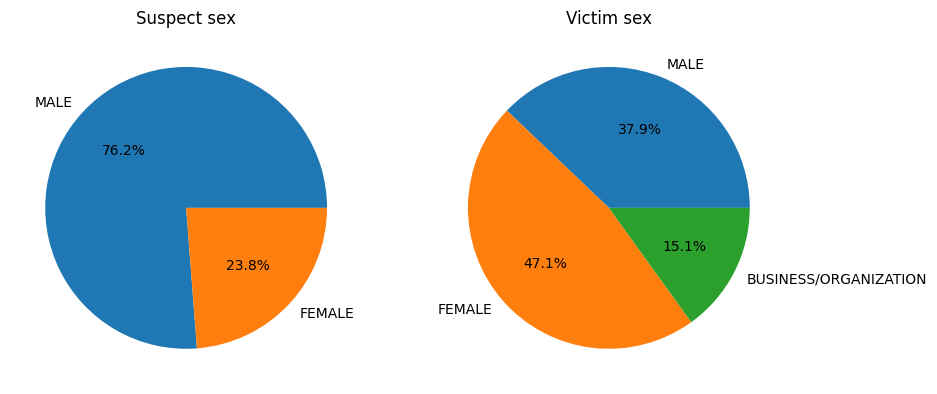

In [7]:
import matplotlib.pyplot as plt
from pymongo import MongoClient
from collections import Counter

# Retrieve data from MongoDB with limit
limit = 1000  # Adjust the limit to a suitable number based on your data size
df = []
for document in collection.find().limit(limit):
    df.append(document)

# Extract necessary fields into separate lists and exclude "unknown" values
susp_sex = [doc['SUSP_SEX'] for doc in df if doc['SUSP_SEX'] != 'UNKNOWN']
vic_sex = [doc['VIC_SEX'] for doc in df if doc['VIC_SEX'] != 'UNKNOWN']

# Perform value counts
susp_sex_counts = dict(Counter(susp_sex))
vic_sex_counts = dict(Counter(vic_sex))

# Perform visualization
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(susp_sex_counts.values(), labels=susp_sex_counts.keys(), autopct='%1.1f%%')
axs[0].set_title('Suspect sex')

axs[1].pie(vic_sex_counts.values(), labels=vic_sex_counts.keys(), autopct='%1.1f%%')
axs[1].set_title('Victim sex')

plt.show()
